In [14]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding
import pandas as pd
import numpy as np

corpus = [
    "This is good pizza", "I love Italian pizza", "The best pizza",
    "nice pizza", "Excellent pizza", "I love pizza", "The pizza was alright",
    "disgusting pineapple pizza", "not good pizza", "bad pizza", "very bad pizza",
    "I had better pizza"
]
labels = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

df = pd.DataFrame({'text': corpus, 'label': labels})

vocab_size = 50
encoded = [one_hot(d, vocab_size) for d in df['text']]

max_len = max(len(d.split()) for d in corpus)
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

model = Sequential([
    Embedding(vocab_size, 8, input_length=max_len),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(padded, labels, epochs=50, verbose=1)

loss, acc = model.evaluate(padded, labels, verbose=0)
print(f"Accuracy: {acc * 100:.2f}%")


Epoch 1/50
1/1 [==============================] - 1s 609ms/step - loss: 0.6956 - accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6941 - accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 0.6927 - accuracy: 0.4167
Epoch 4/50
1/1 [==============================] - 0s 17ms/step - loss: 0.6913 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 15ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6884 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6870 - accuracy: 0.6667
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.7500
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6842 - accuracy: 0.7500
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6828 - accuracy: 0.7500
Epoch 11/50
1/1 [===========

Observations: The model obtained a high accuracy of 91.67%, showing that it learned effectively from the training data. However, the excellent accuracy on such a tiny dataset raises the possibility of overfitting. The model's performance on unseen data should be tested on a separate test set for a more reliable assessment of its generalization.

       tweet_id airline_sentiment  airline_sentiment_confidence  \
0  5.703060e+17           neutral                        1.0000   
1  5.703010e+17          positive                        0.3486   
2  5.703010e+17           neutral                        0.6837   
3  5.703010e+17          negative                        1.0000   
4  5.703010e+17          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN            

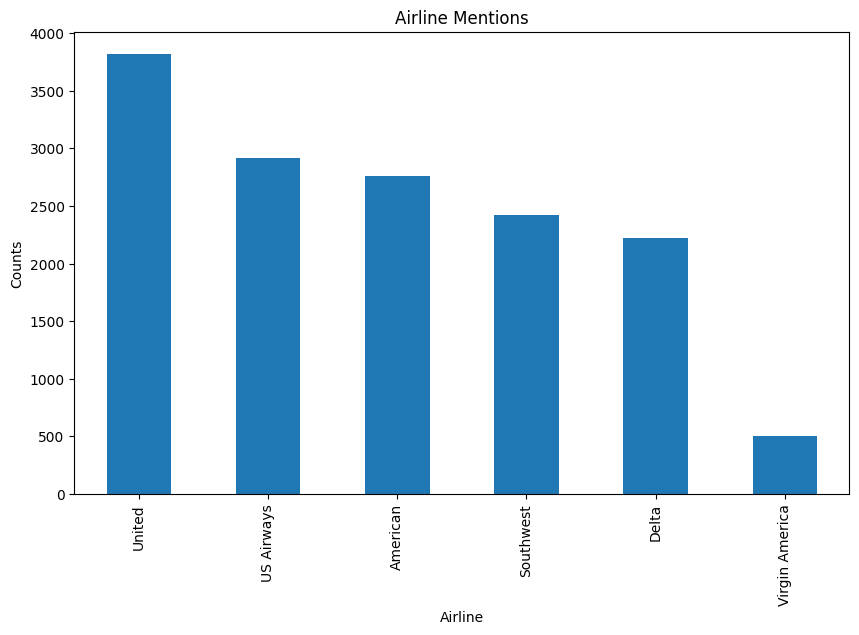

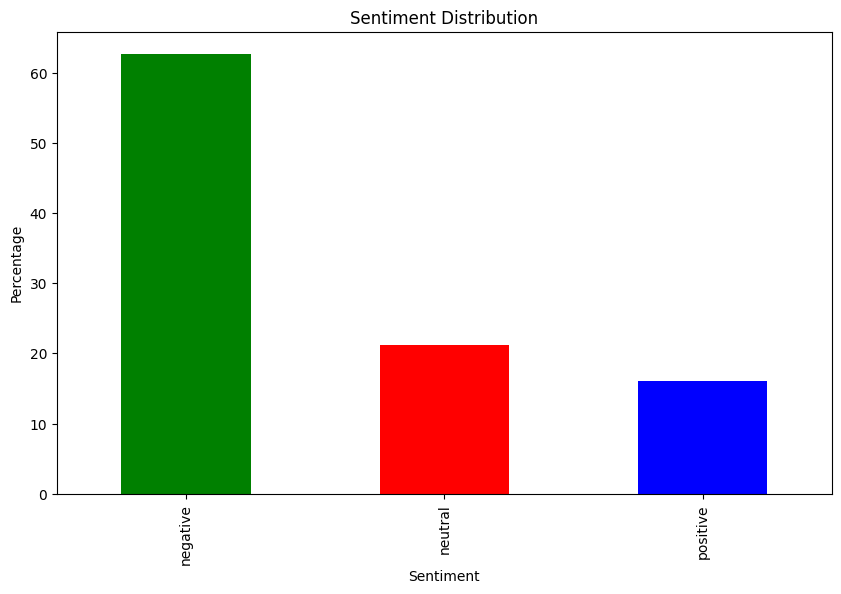

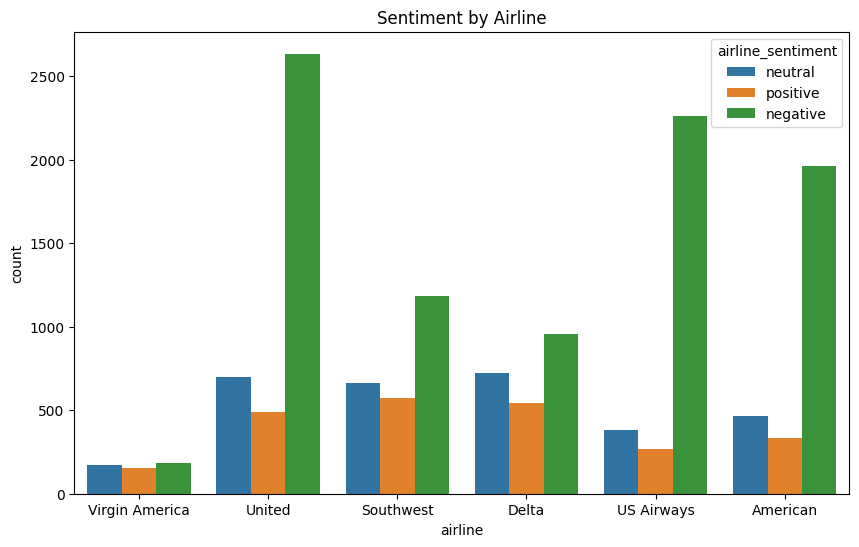

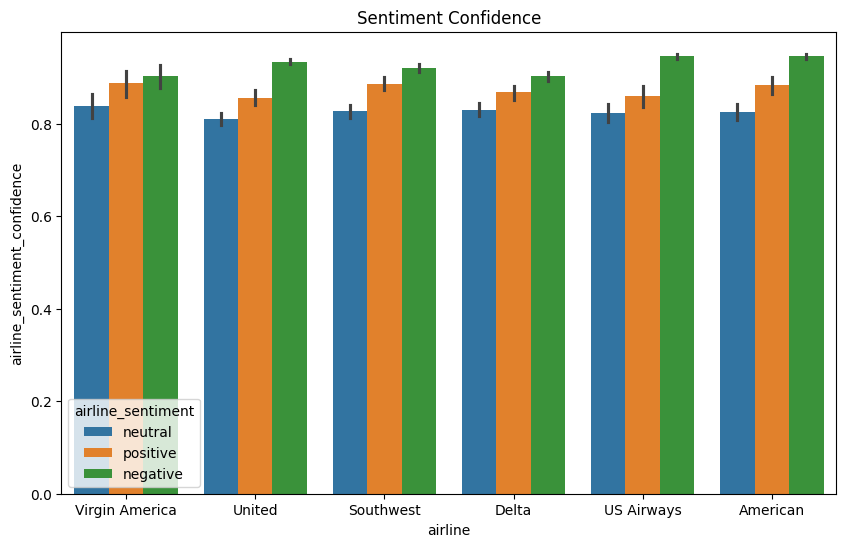

[[1775   75   39]
 [ 298  237   45]
 [ 162   41  256]]
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1889
     neutral       0.67      0.41      0.51       580
    positive       0.75      0.56      0.64       459

    accuracy                           0.77      2928
   macro avg       0.74      0.64      0.67      2928
weighted avg       0.76      0.77      0.76      2928

Accuracy: 0.7745901639344263


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#task 1
df = pd.read_csv('/content/Tweets.csv')
print(df.head())
#task2
counts = df['airline'].value_counts()
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Airline Mentions')
plt.xlabel('Airline')
plt.ylabel('Counts')
plt.show()
#task3
sent_counts = df['airline_sentiment'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sent_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()
#task4
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df)
plt.title('Sentiment by Airline')
plt.show()
#task5
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='airline_sentiment_confidence', hue='airline_sentiment', data=df)
plt.title('Sentiment Confidence')
plt.show()
#task6
X = df['text']
y = df['airline_sentiment']
#task7
def clean(s):
    s = re.sub(r"http\S+", "", s)
    s = re.sub(r"@\S+", "", s)
    s = re.sub(r"[^A-Za-z0-9 ]+", "", s)
    s = s.lower()
    return s
#task8
df['cleaned'] = df['text'].apply(clean)
#task9
vector = CountVectorizer(max_features=1000)
X_vec = vector.fit_transform(df['cleaned'])
#task10
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)
#task11
model = RandomForestClassifier()
model.fit(X_train, y_train)
#task12
preds = model.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))
print('Accuracy:', accuracy_score(y_test, preds))


observations : The model's accuracy was 77.46%, showing modest efficacy in sentiment classification. However, it appears to struggle with 'neutral' and 'positive' attitudes, most likely due to class imbalance or a lack of feature difference. Enhancing feature extraction or modifying model parameters may increase performance across all sentiment classifications. Further inquiry and refinement are suggested.